In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ke_to_momentum(ke, m=938.272013):
    """
    Convert relativistic kinetic energy to momentum.

    Parameters:
        ke : float or array-like
            Kinetic energy in joules
        m : float
            Rest mass in kilograms, devault is proton mass
    Returns:
        float or array-like: momentum in MeV/c
    """
    ke = np.asarray(ke)
    E_total = ke + m
    p = np.sqrt(E_total*E_total - m * m) 
    return p

In [3]:
def momentum_to_ke(p, m=938.272013):
    """
    Convert relativistic momentum to kinetic energy.

    Parameters:
        p : float or array-like
            Momentum in kg·m/s
        m : float
            Rest mass in kilograms
    Returns:
        float or array-like: kinetic energy in joules
    """
    p = np.asarray(p)
    E_total = np.sqrt(p*p + m*m)
    ke = E_total - m 
    return ke

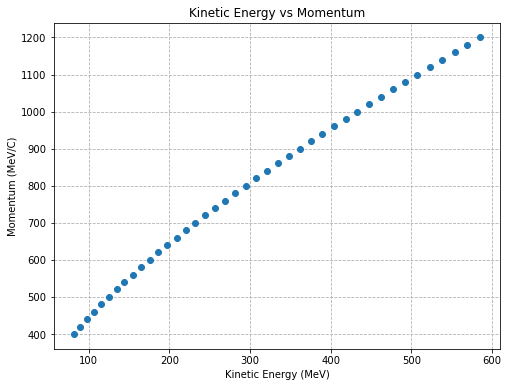

In [4]:
#basic variables definition
p_calc = np.arange(400, 1201, 20)  # momenta from 400 to 1600 MeV/c in steps of 20 MeVs
ke_calc = momentum_to_ke(p_calc) # momenta from 400 to 1600 MeV/c in steps of 20 MeVs


# Plot with log-log scale
plt.figure(figsize=(8, 6))
plt.plot(ke_calc, p_calc, marker='o', linestyle='')

plt.title('Kinetic Energy vs Momentum')
plt.xlabel('Kinetic Energy (MeV)')
plt.ylabel('Momentum (MeV/C)')
plt.grid(True, which='both', ls='--')
plt.show()


In [5]:
#read the dataset
file_path = 'proton_Argon_NIST'
with open(file_path, 'r') as f:
    lines = f.readlines()

# Extract Kinetic Energy (column 0) and CSDA range (column 4)
kinetic_energy = []
csda_range     = [] # g/cm2
proj_range     = [] # g/cm2
argon_density     = 1.40 # g/cm3
argon_density_m1  = 0.71428571428 #  = 1/argon_density [cm3/g]

for line in lines:
    if line.strip():
        parts = line.split()
        try:
            kinetic_energy.append(float(parts[0]))
            csda_range.append(argon_density_m1*float(parts[4]))
            proj_range.append(argon_density_m1*float(parts[5]))
        except (IndexError, ValueError):
            continue


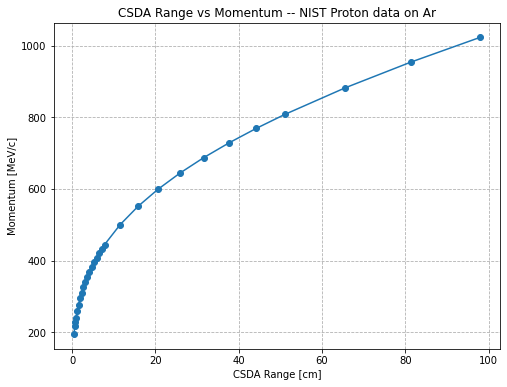

In [12]:
ke   = np.array(kinetic_energy)
p    = ke_to_momentum(ke)
csda = np.array(csda_range    )
proj = np.array(proj_range    )

# Example: select kinetic energies between 0.01 and 10 MeV
mask = (csda >= 0.4) & (csda <= 100)
selected_ke = ke[mask]
selected_csda = csda[mask]  
selected_proj = proj[mask]
selected_p    = p[mask]
            
# Plot with log-log scale
plt.figure(figsize=(8, 6))

#plt.semilogy(selected_ke, selected_proj, marker='x', linestyle='-')
#plt.plot(selected_ke, selected_csda, marker='o', linestyle='')
#plt.plot(selected_ke, selected_proj, marker='x', linestyle='')


plt.plot(selected_csda, selected_p, marker='o', linestyle='-')
plt.title('CSDA Range vs Momentum -- NIST Proton data on Ar')
plt.xlabel('CSDA Range [cm]')
plt.ylabel('Momentum [MeV/c]')

plt.grid(True, which='both', ls='--')
plt.show()
